# Morphological Operations

This notebook talks about morphological operations on images.

Demos for
1. Erosion
2. Dilation
3. Opening
4. Closing
5. Morphological Gradient
6. Top Hat/ White Hat
7. Black Hat

[This OpenCV documentation on morphological operations is amazing](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

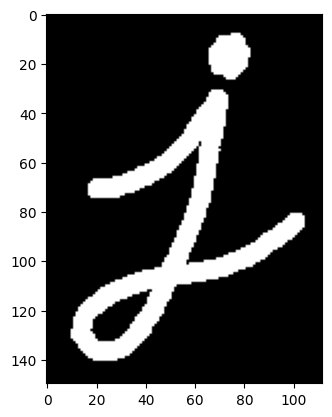

In [37]:
img = cv2.imread("./images/j.png")
plt.imshow(img)
plt.show()

## Erosion

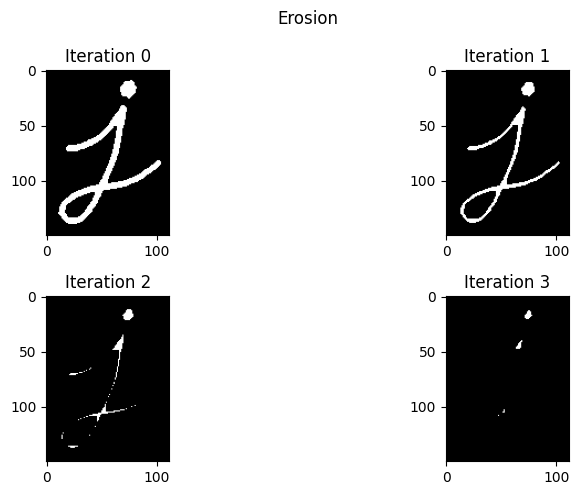

In [38]:
iterations = 4
super_title = "Erosion"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # Create subplots with 3 rows and 2 columns

for (title, iteration), ax in zip([(f"Iteration {i}", i) for i in range(iterations)], axes.flatten()):    
    ax.set_title(title)
    eroded = cv2.erode(img.copy(), None, iterations=iteration + 1)
    ax.imshow(eroded)

fig.suptitle(super_title)
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Dilation

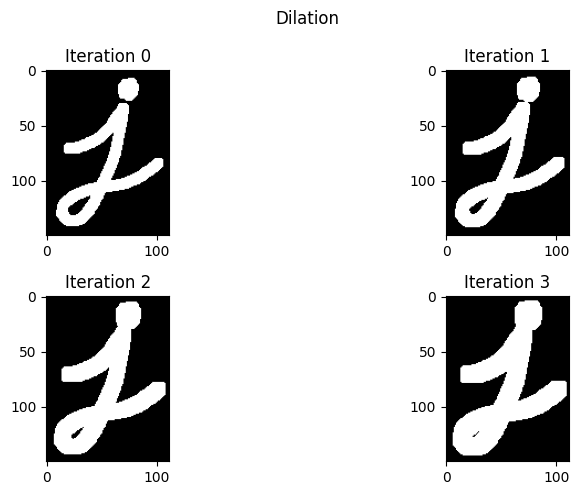

In [39]:
iterations = 4
super_title = "Dilation"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # Create subplots with 3 rows and 2 columns

for (title, iteration), ax in zip([(f"Iteration {i}", i) for i in range(iterations)], axes.flatten()):    
    ax.set_title(title)
    dilated = cv2.dilate(img.copy(), None, iterations=iteration + 1)
    ax.imshow(dilated)

fig.suptitle(super_title)
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Opening

Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

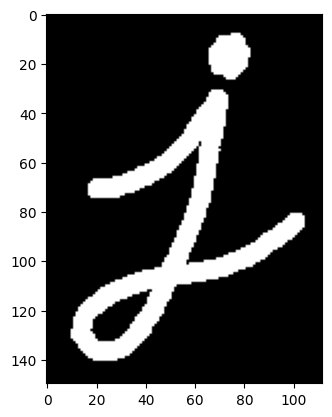

In [40]:
img = cv2.imread("./images/j.png")
plt.imshow(img)
plt.show()

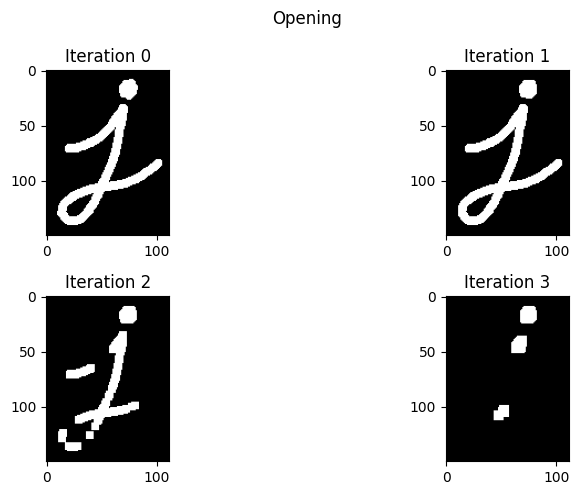

In [41]:
iterations = 4
super_title = "Opening"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # Create subplots with 3 rows and 2 columns

for (title, iteration), ax in zip([(f"Iteration {i}", i) for i in range(iterations)], axes.flatten()):    
    ax.set_title(title)
    eroded = cv2.erode(img.copy(), None, iterations=iteration + 1)
    dilated = cv2.dilate(eroded, None, iterations=iteration+1)
    ax.imshow(dilated)

fig.suptitle(super_title)
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Closing

As the name suggests, a closing is used to close holes inside of objects or for connecting components together


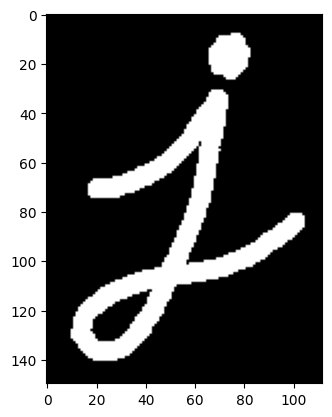

In [42]:
img = cv2.imread("./images/j.png")
plt.imshow(img)
plt.show()

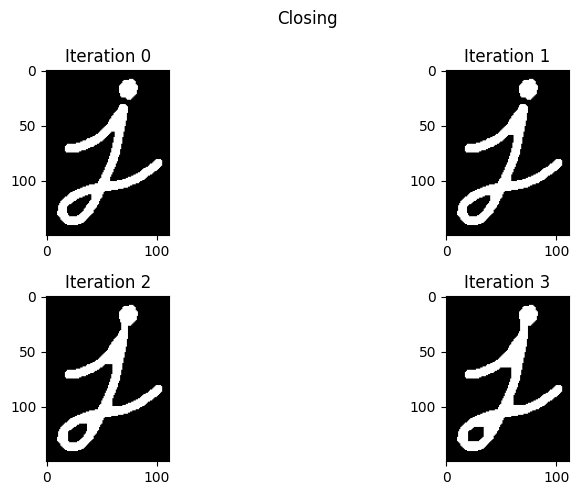

In [43]:
iterations = 4
super_title = "Closing"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # Create subplots with 3 rows and 2 columns

for (title, iteration), ax in zip([(f"Iteration {i}", i) for i in range(iterations)], axes.flatten()):    
    ax.set_title(title)
    dilated = cv2.dilate(img.copy(), None, iterations=iteration+1)
    eroded = cv2.erode(dilated, None, iterations=iteration + 1)    
    ax.imshow(eroded)

fig.suptitle(super_title)
plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Morphological Gradient

A morphological gradient is the difference between the dilation and erosion. It is useful for determining the outline of a particular object of an image:

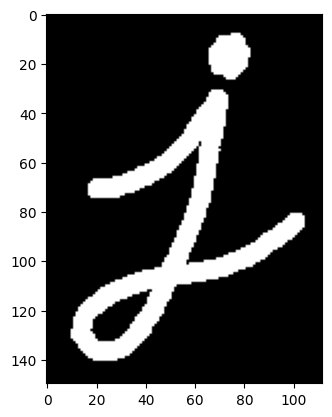

In [44]:
img = cv2.imread("./images/j.png")
plt.imshow(img)
plt.show()

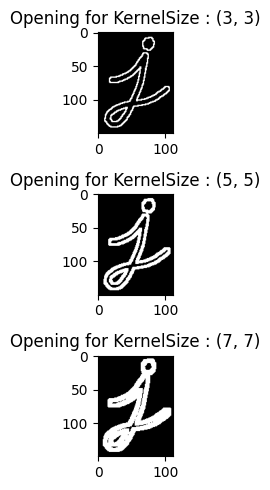

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))  # Create subplots with 3 rows and 2 columns
# of kernels sizes that will be applied to the image
kernelSizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply an "opening" operation to the image
for (title, kernelSize), ax in zip([(f"Opening for KernelSize : {i}", i) for i in kernelSizes], axes.flatten()):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    ax.set_title(title)
    ax.imshow(opening)

plt.tight_layout()  # Adjust the subplots to prevent overlap
plt.show()  # Show the plot

## Top Hat/White Hat
A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.

A top hat operation is used to reveal bright regions of an image on dark backgrounds.

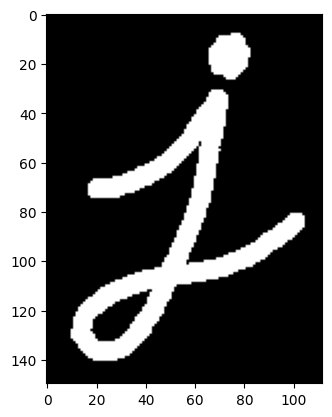

In [50]:
img = cv2.imread("./images/j.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

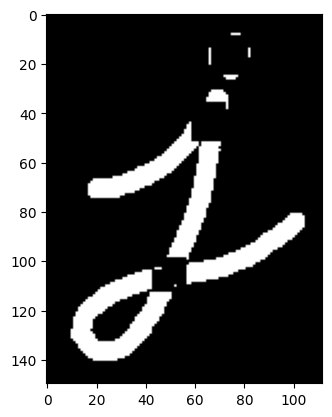

In [51]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
tophat = cv2.morphologyEx(img.copy(), cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)
plt.show()

## Black Hat

We apply the black hat operator to reveal dark regions (i.e. the license plate text) against light backgrounds (i.e. the license plate itself).

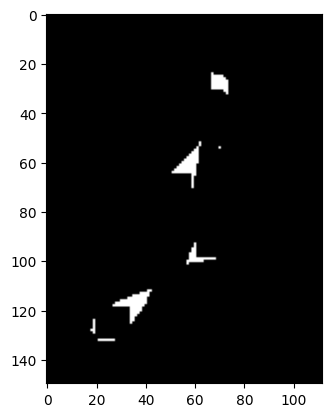

In [52]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
black_hat = cv2.morphologyEx(img.copy(), cv2.MORPH_BLACKHAT, kernel)
plt.imshow(black_hat)
plt.show()